In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv("Logistic_X_Train.csv")
dfy = pd.read_csv("Logistic_Y_Train.csv")
dfx.shape,dfy.shape

((3000, 3), (3000, 1))

In [3]:
dfx.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [8]:
dfy.value_counts()

label
0        1509
1        1491
dtype: int64

# NORMALIZING AND VISUALIZING

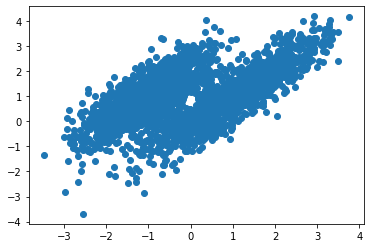

In [9]:
plt.scatter(dfx.f1,dfx.f2)
plt.show()

In [13]:
X = dfx.values
y = dfy.values

u = np.mean(X)
std = np.std(X)
X = (X-u)/std
print(X)

[[-1.23608005  0.31486715 -0.6816324 ]
 [-1.0775092   0.35568662 -1.27066137]
 [-0.74953968  0.96256718 -1.35506599]
 ...
 [-0.20055496  1.00879471 -1.98037664]
 [ 0.92016383  0.40076717  0.90468374]
 [-1.0336338   0.17045789 -1.47008557]]


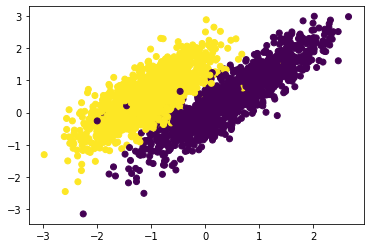

In [14]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [15]:
# we can see from the graph that the data was already normalized!

# LOGISTIC REGRESSION

In [21]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X,theta):
    """
    X-dataset(m,n+1)
    theta-(n+1,1)
    
    """
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    """
    X-(m,n+1)
    y-(m,1)
    theta-(n+1,1)
    
    """
    hi = hypothesis(X,theta)
    err = (y*np.log(hi)) + ((1-y)*(np.log(1-hi))) #since y and hi are vector here element wise multiplication will be performed rather than matrix one
    err = -1*np.mean(err)
    
    return err

def grad(X,y,theta):
    """
    X-(m,n+1)
    y-(m,1)
    theta-(n+1,1)
    [X.T*(y-h)]gradient vector-(n+1,1)   all examples of first feature X y-hi
    
    """
    
    hi = hypothesis(X,theta)
    grad = np.dot(X.T,(y-hi))
    m = X.shape[0]
    return grad/m

def grad_desc(X,y,lr=0.5,max_itr=500):
    n = X.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    
    for i in range (max_itr):
        err = error(X,y,theta)
        error_list.append(err)
        gradient = grad(X,y,theta)
        theta = theta + lr*gradient
        
    return(theta,error_list)

In [17]:
#adding row of ones for vectorization
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
X.shape

(3000, 4)

In [18]:
y.shape

(3000, 1)

In [22]:
theta,err_list = grad_desc(X,y)
theta

array([[-3.46238713],
       [-3.40972794],
       [ 2.54562219],
       [-2.83765012]])

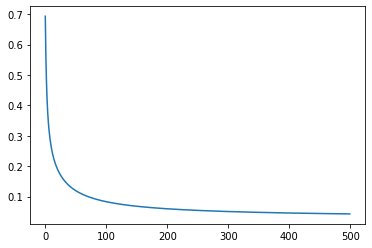

In [23]:
plt.plot(err_list)
plt.show()

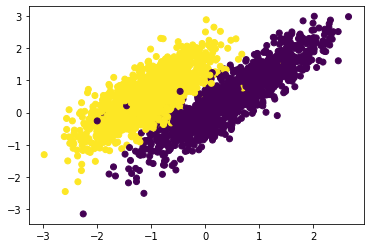

In [25]:
plt.scatter(X[:,1],X[:,2],c=y)
plt.show()

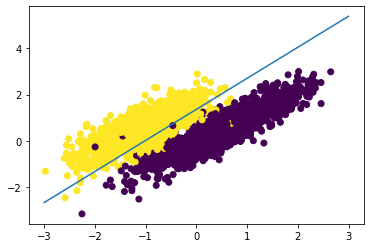

In [27]:
x1 = np.arange(-3,4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.scatter(X[:,1],X[:,2],c=y)
plt.plot(x1,x2)
plt.show()

# PREDICTIONS AND ACCURACY

In [30]:
x_test = pd.read_csv('Logistic_X_Test.csv')
#normalizing and vectorizing data
x_test = (x_test-u)/std
ones = np.ones((x_test.shape[0],1))
x_test = np.hstack((ones,x_test))
x_test.shape

(1000, 4)

In [31]:
def pred(X,theta):
    hi = hypothesis(X,theta)
    output = np.zeros((X.shape[0],1))
    output[hi>=0.5] = 1
    return output.astype('int')

In [32]:
x_train_pred = pred(X,theta)
x_test_pred = pred(x_test,theta)

In [33]:
def accuracy(y,y_):
    y = y.astype('int')
    acc = np.sum(y==y_)/y.shape[0]
    return acc*100

In [34]:
accuracy(x_train_pred,y)

99.36666666666667

In [35]:
x_test_pred

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

# Using sklearn

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(dfx,y)
theta_0 = model.intercept_
theta_s = model.coef_
theta_0,theta_s

(array([0.27335768]), array([[-0.2934378 ,  0.23053581, -0.15402876]]))

In [47]:
model.score(dfx,y)*100

89.63522951336218

In [ ]:
#not much good as compared to our raw approach